In [32]:
import numpy as np
import cv2 as cv
import glob
import flowiz as fz
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
files = glob.glob('./img/KITTI/*.png')
files

['./img/KITTI/000133.png',
 './img/KITTI/000145.png',
 './img/KITTI/000135.png',
 './img/KITTI/000141.png',
 './img/KITTI/000149.png',
 './img/KITTI/000139.png',
 './img/KITTI/000146.png',
 './img/KITTI/000136.png',
 './img/KITTI/000134.png',
 './img/KITTI/000148.png',
 './img/KITTI/000137.png',
 './img/KITTI/000147.png',
 './img/KITTI/000144.png',
 './img/KITTI/000138.png',
 './img/KITTI/000142.png',
 './img/KITTI/000130.png',
 './img/KITTI/000140.png',
 './img/KITTI/000143.png',
 './img/KITTI/000131.png',
 './img/KITTI/000150.png',
 './img/KITTI/000132.png']

(375, 1242)
uint8


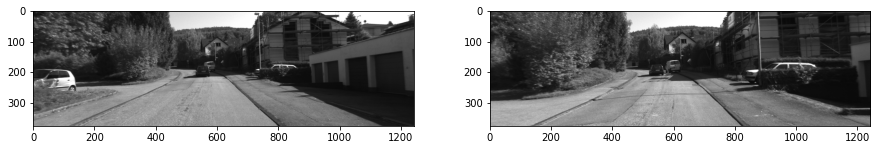

In [65]:
# perpare image
prevImg_bgr = cv.imread(files[0])
nextImg_bgr = cv.imread(files[1])

prevImg = cv2.cvtColor(prevImg_bgr ,cv2.COLOR_BGR2GRAY)
nextImg = cv2.cvtColor(nextImg_bgr ,cv2.COLOR_BGR2GRAY)

prevImg_rgb = cv2.cvtColor(prevImg_bgr, cv2.COLOR_BGR2RGB)
nextImg_rgb = cv2.cvtColor(nextImg_bgr, cv2.COLOR_BGR2RGB)

print(prevImg.shape)
print(prevImg.dtype)

fig, axarr = plt.subplots(1,2)
fig.set_size_inches(15, 5)
axarr[0].imshow(prevImg_rgb)
axarr[1].imshow(nextImg_rgb)

In [66]:
# Extract features
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
prevPts = cv.goodFeaturesToTrack(prevImg, mask = None, **feature_params)

In [67]:
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
# calculate optical flow
nextPts, status, error = cv.calcOpticalFlowPyrLK(prevImg, nextImg, prevPts, None, **lk_params)

In [72]:
# Create a mask image for drawing purposes
mask1 = np.zeros_like(nextImg_rgb)
mask2 = np.zeros_like(nextImg_rgb)
mask1[0,0]

array([0, 0, 0], dtype=uint8)

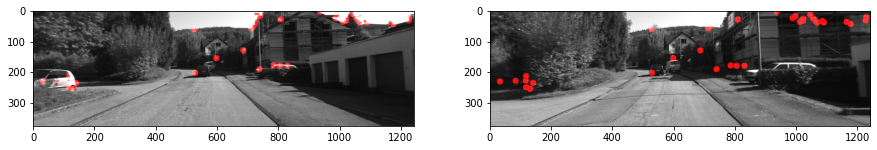

In [80]:
for i in range(prevPts.shape[0]):
    draw_mask1 = cv.circle(mask1,(prevPts[i, 0, 0],prevPts[i, 0, 1]), 10 , (255, 0, 0),-1)
    
for i in range(nextPts.shape[0]):
    draw_mask2 = cv.circle(mask2,(prevPts[i, 0, 0],prevPts[i, 0, 1]), 10 , (255, 0, 0),-1)
    
show_img1 = cv.add(prevImg_rgb, mask1)
show_img2 = cv.add(nextImg_rgb, mask2)
# plt.imshow(show_img1)
fig2, axarr2 = plt.subplots(1,2)
fig2.set_size_inches(15, 5)
axarr2[0].imshow(show_img1)
axarr2[1].imshow(show_img2)

In [70]:
img = cv2.add(frame,mask)

NameError: name 'frame' is not defined

In [71]:
prevPts[0, 0, 0]

804.0

In [56]:
prevPts.shape[0]

40